In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose


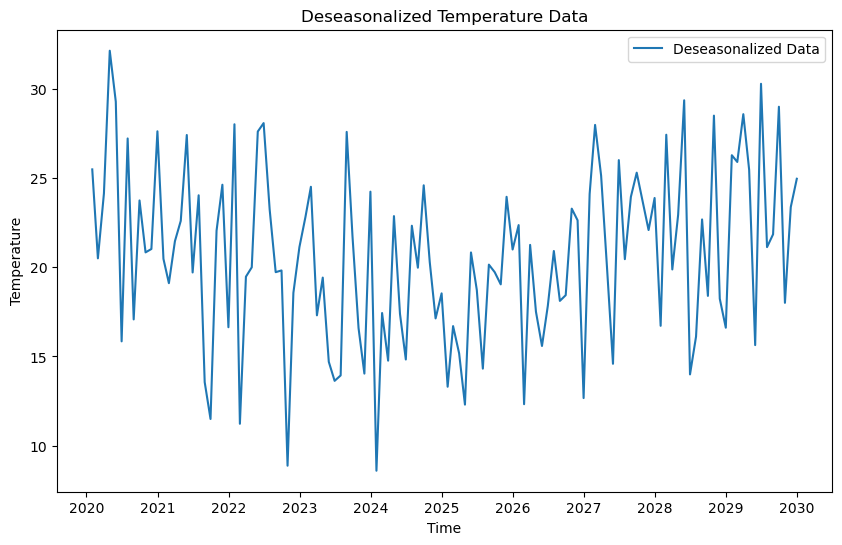

In [2]:
# Example data setup
np.random.seed(0)
data = pd.DataFrame({
    'Time': pd.date_range(start='1/1/2020', periods=120, freq='M'),
    'Value': np.random.normal(loc=20, scale=5, size=120)  # Simulated temperature data
})

# 1. Deseasonalization using seasonal_decompose
decomposition_result = seasonal_decompose(data['Value'], model='additive', period=12)
data['Deseasonalized'] = data['Value'] - decomposition_result.seasonal

# Plotting the deseasonalized data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Deseasonalized'], label='Deseasonalized Data')
plt.title('Deseasonalized Temperature Data')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [7]:
# 2. T-test and Z-test
# Generating some sample data
sample1 = np.random.normal(100, 10, size=30)
sample2 = np.random.normal(105, 10, size=30)

# Two-sample t-test
t_stat, p_value = stats.ttest_ind(sample1, sample2)
print(f'T-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}')

# Z-test (using formula for large samples)
z_stat = (np.mean(sample1) - np.mean(sample2)) / np.sqrt(np.var(sample1)/len(sample1) + np.var(sample2)/len(sample2))
print(f'Z-test statistic: {z_stat:.4f}')

T-test results: t-statistic = -4.4706, p-value = 0.0000
Z-test statistic: -4.5470


In [9]:
# 3. Confidence Interval (using t-distribution for sample mean)
confidence_level = 0.95
degrees_freedom = len(sample1) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, np.mean(sample1), stats.sem(sample1))
print(f'95% confidence interval for sample1 mean: {confidence_interval}')

95% confidence interval for sample1 mean: (91.97887723152603, 98.38253686075019)


In [5]:
# 4. Linear Regression and R-square
X = np.random.normal(0, 1, 100).reshape(-1, 1)  # Independent variable
y = 3 * X.squeeze() + np.random.normal(0, 0.5, 100)  # Dependent variable with noise

model = LinearRegression().fit(X, y)
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f'Regression MSE: {mse}, R-square: {r2}')

Regression MSE: 0.20045569755657155, R-square: 0.9781293678725684


In [6]:
# 5. Covariance between two datasets
data1 = np.random.normal(0, 1, 100)
data2 = 1.5 * data1 + np.random.normal(0, 0.5, 100)  # Create some correlation
cov_matrix = np.cov(data1, data2)

print(f'Covariance matrix between data1 and data2: \n{cov_matrix}')

Covariance matrix between data1 and data2: 
[[1.08189225 1.66377556]
 [1.66377556 2.84328739]]


In [10]:
# 6. For Two or more populations

# Generating random sample data for two different climates
np.random.seed(0)
data1 = np.random.normal(30, 3, 40)  # Mean temperature for region 1
data2 = np.random.normal(32, 5, 50)  # Mean temperature for region 2

# Difference in means
difference_in_means = np.mean(data1) - np.mean(data2)

# Standard Error calculation for independent samples
se_independent = np.sqrt(np.var(data1, ddof=1)/len(data1) + np.var(data2, ddof=1)/len(data2))

# Independent Samples T-test
t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=False)

# Welch's T-test (unequal variances)
welch_t_stat, welch_p_value = stats.ttest_ind(data1, data2, equal_var=False)

print(f"Difference in Means: {difference_in_means:.2f}")
print(f"Standard Error: {se_independent:.2f}")
print(f"Independent T-test: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")
print(f"Welch's T-test: t-statistic = {welch_t_stat:.3f}, p-value = {welch_p_value:.3f}")

Difference in Means: 0.13
Standard Error: 0.84
Independent T-test: t-statistic = 0.154, p-value = 0.878
Welch's T-test: t-statistic = 0.154, p-value = 0.878


In [ ]:
'''
Scenario:
Group A: Plants treated with Fertilizer A.
Group B: Plants treated with Fertilizer B.
You have collected height data from both groups, and now you want to test if there is a significant difference in the mean heights using a two-sample t-test.

Data:
Group A heights: 28, 33, 30, 29, 31, 34, 32
Group B heights: 26, 22, 24, 25
'''
# Data
heights_a = np.array([28, 33, 30, 29, 31, 34, 32])
heights_b = np.array([26, 22, 24, 25])

# Calculate the means and standard deviations
mean_a = np.mean(heights_a)
mean_b = np.mean(heights_b)
std_a = np.std(heights_a, ddof=1)
std_b = np.std(heights_b, ddof=1)

# Sample sizes
n_a = len(heights_a)
n_b = len(heights_b)

# Calculate the t-statistic for independent samples
t_stat = (mean_a - mean_b) / np.sqrt((std_a**2 / n_a) + (std_b**2 / n_b))

# Degrees of freedom using the Welch-Satterthwaite equation
df = ((std_a**2 / n_a + std_b**2 / n_b)**2) / \
     ((std_a**2 / n_a)**2 / (n_a - 1) + (std_b**2 / n_b)**2 / (n_b - 1))

# Calculate the p-value for a two-sided test
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df))

print(f"Mean Height Group A: {mean_a:.2f}")
print(f"Mean Height Group B: {mean_b:.2f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"Degrees of Freedom: {df:.2f}")
print(f"P-value: {p_value:.4f}")

'''
What this script does:
Data Preparation: First, we define the height data for the two groups.
Statistical Calculations: Calculate the means and standard deviations for both groups.
T-statistic Calculation: Compute the t-statistic using the formula for independent samples where variances are not necessarily equal.
Degrees of Freedom: Calculate using the Welch-Satterthwaite equation, which is used in Welch's t-test to accommodate unequal variances and different sample sizes.
P-value Calculation: The p-value is computed using the t.cdf() function for a two-sided test, checking both tails of the distribution since we are interested in any significant difference.

Interpretation:
The t-statistic provides a measure of the difference between the two means relative to the spread or variability of their scores.
The p-value tells us whether the difference in means is statistically significant. A small p-value (typically < 0.05) would lead us to reject the null hypothesis of equal means, suggesting a statistically significant difference in plant height due to the type of fertilizer used.'''